In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import operator
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print(red.info())

print('-------------------------')

print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar

In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

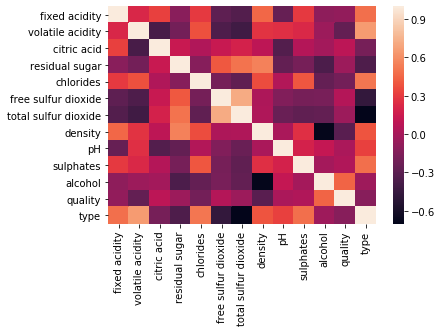

In [11]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

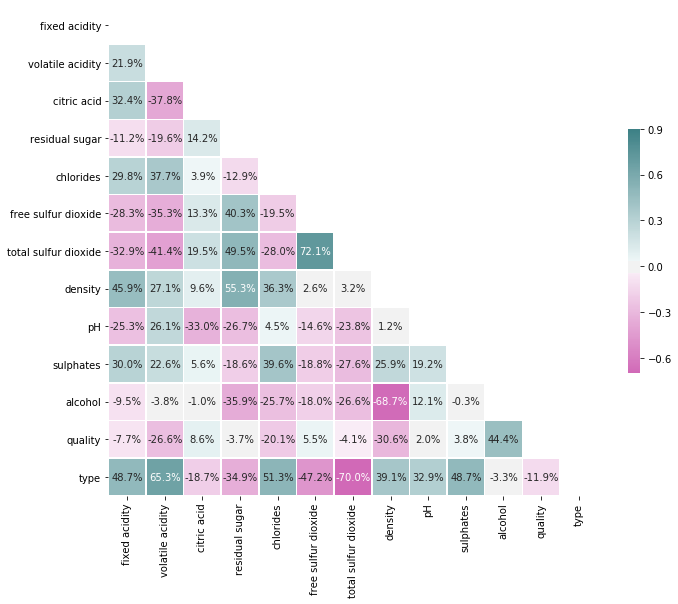

In [13]:
#Visualize correlation via heatmap
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
corr = wines.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, 
            fmt='.1%',
            mask=mask,
            cmap=cmap,
            vmax=.9,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [16]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
#defining confusion matrix plotting function
#sourced from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['White','Red']

kNN Accuracy is 0.94
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1191
           1       0.94      0.83      0.88       434

   micro avg       0.94      0.94      0.94      1625
   macro avg       0.94      0.90      0.92      1625
weighted avg       0.94      0.94      0.94      1625



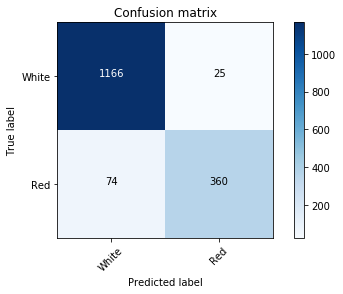

In [19]:
# Defining the kNNClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))

#The cross validation score is obtained for kNN using 10 folds
#Cross-validation is used to split the data into training and test sets to evaluate how the model performs

score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))

#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Logistic Accuracy is 0.98
Cross Validation Score = 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1191
           1       0.97      0.94      0.95       434

   micro avg       0.98      0.98      0.98      1625
   macro avg       0.97      0.96      0.97      1625
weighted avg       0.98      0.98      0.98      1625



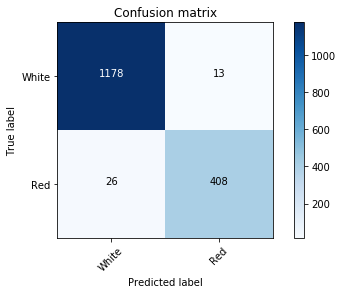

In [20]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

SVM Accuracy is 0.94
Cross Validation Score = 0.94
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1191
           1       0.97      0.80      0.87       434

   micro avg       0.94      0.94      0.94      1625
   macro avg       0.95      0.89      0.92      1625
weighted avg       0.94      0.94      0.94      1625



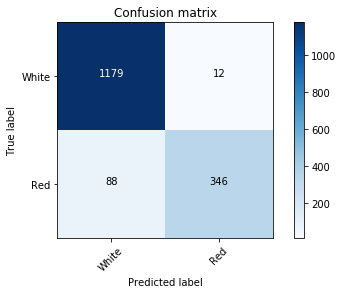

In [21]:
#SVM Classifier
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Decision Tree Accuracy is 0.96
Cross Validation Score = 0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1191
           1       0.92      0.94      0.93       434

   micro avg       0.96      0.96      0.96      1625
   macro avg       0.95      0.96      0.95      1625
weighted avg       0.96      0.96      0.96      1625



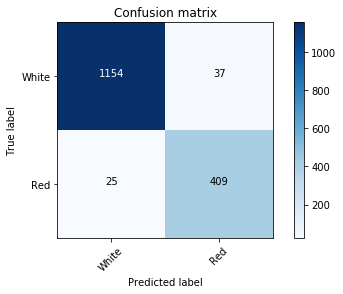

In [22]:
# Decision Tree Classifier
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Random Forest Accuracy is 1.00
Cross Validation Score = 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1191
           1       1.00      0.98      0.99       434

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       1.00      1.00      1.00      1625



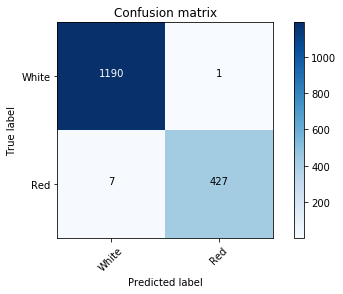

In [24]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

[0.06216387 0.22510254 0.01366913 0.0471294  0.17602816 0.06817767
 0.2322318  0.06142841 0.03864072 0.05739041 0.01803789]


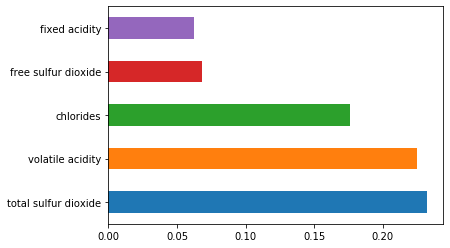

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [27]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [31]:
# Model output shape
#model.output_shape

# Model summary
#model.summary()

# Model config
#model.get_config()

# List all weight tensors 
#model.get_weights()

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

AttributeError: 'ExtraTreesClassifier' object has no attribute 'compile'

In [ ]:
y_pred = model.predict(X_test)